# BUSINESS PROBLEM 
Car insurance is a sector that is increasingly weighed down by the challenge of fraudulent claims-a pervasive problem that has widespread implications on financial stability, operational efficiency, and customer trust. In this respect, fraudsters submit claims for faked accidents, inflated damages, or fully fabricated incidents that combined result in billions of dollars in losses annually. These losses are not limited to direct payouts for illegitimate claims but also include increased administrative costs for investigations, legal disputes, and reputational damage to insurers. Traditional fraud detection methods involve a number of resource-intensive and time-consuming processes, including manual reviews and rule-based systems, which often cannot disclose sophisticated fraud schemes. 

These are bound by a lack of ability to evolve with newer fraud tactics and thus result in high false-positive rates, where legitimate claims are flagged off as fraudulent, causing customer dissatisfaction and increased operational strain. Furthermore, the emergence of organized fraud rings, synthetic claims with fictitious identities, and digital manipulation of evidence have complicated the issue further and made the identification and prevention of fraud more challenging with conventional methods. 

The financial impact is huge, whereby insurers have to increase premiums to cover the losses, thus penalizing the honest policyholders and risking customer attrition. On the other hand, delays in claim processing due to extensive fraud investigations erode trust in insurers and create dissatisfaction among policyholders. There is an urgent need for innovative and scalable solutions that can strengthen fraud detection and prevention. 

Machine learning offers a paradigm-shifting approach, providing tools to analyze large datasets, identify patterns, and detect anomalies in real time. ML models adapt to new fraud tactics, reducing the manual review burden while improving accuracy and efficiency. Advanced ML algorithms will help insurers reduce financial losses, streamline operations, and foster a more trustworthy relationship with their customers to ensure long-term sustainability in an increasingly competitive market.



In [3]:
# pip install --upgrade pip

In [4]:
# pip cache purge

In [5]:
# !pip install scikit-learn==1.4.2 
# !pip install imbalanced-learn==0.13.0    # (Latest Versions for avoiding unwanted errors)

#### It consists of 15,420 records of which only 6% (923 records) are fraudulent.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries for data manipulation, visualization, and machine learning tasks.
### - numpy, pandas: For numerical computations and data manipulation.
### - matplotlib, seaborn: For creating visualizations.
### - sklearn: Provides tools for preprocessing, model building, and evaluation.
### - imbalanced-learn (SMOTE): For handling imbalanced datasets.
### - xgboost: For advanced gradient boosting algorithms.
### - warnings: To suppress warnings for cleaner outputs.

In [8]:
data=pd.read_csv(r'C:\Users\Akash\Downloads\carclaims.csv')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [9]:
data.shape

(15420, 33)

In [10]:
data.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [11]:
data.tail(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [12]:
data.describe(include="all")

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,9,2,2,2,4,5,5,NaN,3,2
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision,No
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5593,14992,15333,15179,7047,14324,14316,NaN,5962,14497
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN,NaN


# Duplicates

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape # No duplication data point

(15420, 33)

In [16]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

### Here I have passed the dropping of duplicates code to make sure that there are no duplicate points in the dataset

# MISSING VALUE TREATMENT 

In [18]:
data.isnull().sum()      #No missing values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

### We can see that there are no missing values present in the dataset

In [19]:
data['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [20]:
len(data[data['Age']==0]) #rows with a 0

320

In [21]:
data[data['Age'] == 0][['Age', 'AgeOfPolicyHolder']] # In age column rows with a 0 are all with age between 16 to 17

,Age,AgeOfPolicyHolder
7,0,16 to 17
13,0,16 to 17
28,0,16 to 17
31,0,16 to 17
58,0,16 to 17
...,...,...
15243,0,16 to 17
15262,0,16 to 17
15274,0,16 to 17
15379,0,16 to 17


### This code filters the dataset to identify rows where the 'Age' column has a value of 0, indicating potential missing or incorrect data.
### It displays only the 'Age' and 'AgeOfPolicyHolder' columns for these rows.



In [22]:
data.Age.replace({0:16.5},inplace=True)

### Because the row with Age == 0, only appear in row with AgeOfPolicyHolder == '16 to 17', i will replace with 16.5

In [23]:
len(data.loc[data.Age == 0])

0

In [24]:
data["Age"].head(10)

0    21.0
1    34.0
2    47.0
3    65.0
4    27.0
5    20.0
6    36.0
7    16.5
8    30.0
9    42.0
Name: Age, dtype: float64

In [25]:
# Two columns with same name
data[['AgeOfPolicyHolder','Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21.0
1,31 to 35,34.0
2,41 to 50,47.0
3,51 to 65,65.0
4,31 to 35,27.0
...,...,...
15415,31 to 35,35.0
15416,31 to 35,30.0
15417,26 to 30,24.0
15418,31 to 35,34.0


In [26]:
data[['BasePolicy', 'PolicyType']]

,BasePolicy,PolicyType
0,Liability,Sport - Liability
1,Collision,Sport - Collision
2,Collision,Sport - Collision
3,Liability,Sedan - Liability
4,Collision,Sport - Collision
...,...,...
15415,Collision,Sedan - Collision
15416,Liability,Sedan - Liability
15417,Collision,Sedan - Collision
15418,All Perils,Sedan - All Perils


#### Drop unwated columns

In [28]:
#"PolicyNumber" , It's an ID number
#"AgeOfPolicyHolder" , Redundant with Age
#"BasePolicy" , Redundant with PolicyType
unwanted_col=["PolicyType","PolicyNumber","AgeOfPolicyHolder","RepNumber"]
data1=data.drop(unwanted_col, axis=1)

# Identifying and removing redundant or unnecessary columns from the dataset.
### - "PolicyNumber": Acts as an identifier and does not contribute to analysis or modeling.
### - "AgeOfPolicyHolder": Redundant as it correlates with the "Age" column.
### - "BasePolicy": Redundant as it overlaps with "PolicyType".
### - Adding "RepNumber" to the list of columns to be dropped.

In [29]:
data1.shape

(15420, 29)

In [30]:
data1.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,Yes,No,External,none,no change,1 vehicle,1994,Collision,No


## Rename

In [32]:
data1=data1.rename(columns={"Days:Policy-Accident":"DaysOfPolicyAccident"})
data1=data1.rename(columns={"Days:Policy-Claim":"DaysOfPolicyClaim"})
data1=data1.rename(columns={"AddressChange-Claim":"AddressChangeClaim"})

# Renaming specific columns in the dataset for better readability and consistency.
### - "Days:Policy-Accident" is renamed to "DaysOfPolicyAccident".
### - "Days:Policy-Claim" is renamed to "DaysOfPolicyClaim".
### - "AddressChange-Claim" is renamed to "AddressChangeClaim".

In [33]:
data1.FraudFound.value_counts()

FraudFound
No     14497
Yes      923
Name: count, dtype: int64

In [34]:
data1['DaysOfPolicyAccident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [35]:
data1['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [36]:
data1['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [37]:
data1['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [38]:
data1['VehiclePrice'].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [39]:
data1['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [40]:
data1['DaysOfPolicyClaim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [41]:
data1['AddressChangeClaim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [42]:
data1['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [43]:
#data[["DaysOfPolicyClaim"]]

In [44]:
data1.DaysOfPolicyAccident.replace({'none' : 0,'1 to 7' : 1,'8 to 15' : 2,'15 to 30' :3,'more than 30' :4 },inplace=True)
data1.PastNumberOfClaims.replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3 },inplace=True)
data1.AgeOfVehicle.replace({ 'new' : 0,'2 years' : 1,'3 years' : 2, '4 years' : 3, '5 years' : 4, '6 years' : 5,'7 years' : 6,'more than 7' : 7 },inplace=True)
data1.NumberOfSuppliments.replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3 },inplace=True)
data1.VehiclePrice.replace({'less than 20000' : 0,'20000 to 29000': 1,'30000 to 39000': 2,'40000 to 59000': 3, '60000 to 69000' : 4,'more than 69000' : 5},inplace=True)
data1.NumberOfSuppliments.replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3 },inplace=True)
data1.DaysOfPolicyClaim.replace({'none':0,'8 to 15' :1,'15 to 30' :2,'more than 30' :3},inplace=True)
data1.AddressChangeClaim.replace({'no change' : 0,'under 6 months' : 1,'1 year' : 2,'2 to 3 years' : 3,'4 to 8 years' : 4 },inplace=True)
data1.NumberOfCars.replace({'1 vehicle' : 0,'2 vehicles' : 1, '3 to 4' : 2,'5 to 8' : 3,'more than 8' : 4},inplace=True)

# Replacing categorical values with numerical equivalents for multiple columns to prepare data for modeling.
### - "DaysOfPolicyAccident": Maps ranges to numerical values (e.g., 'none' -> 0, '1 to 7' -> 1).
### - "PastNumberOfClaims": Maps claim counts to numerical values (e.g., 'none' -> 0, '2 to 4' -> 2).
### - "AgeOfVehicle": Maps vehicle age categories to numeric values (e.g., 'new' -> 0, '3 years' -> 2).
### - "NumberOfSuppliments": Maps supplement ranges to numeric values (e.g., 'none' -> 0, '3 to 5' -> 2).
### - "VehiclePrice": Converts price ranges into numeric buckets (e.g., 'less than 20000' -> 0, '60000 to 69000' -> 4).
### - "DaysOfPolicyClaim": Converts claim duration ranges into numeric values (e.g., 'none' -> 0, '15 to 30' -> 2).
### - "AddressChangeClaim": Converts address change periods to numeric values (e.g., 'no change' -> 0, 'under 6 months' -> 1).
### - "NumberOfCars": Converts vehicle count ranges to numeric values (e.g., '1 vehicle' -> 0, 'more than 8' -> 4).


# data type conversion 

In [46]:
le=LabelEncoder()

In [47]:
data1.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
VehicleCategory          object
VehiclePrice             object
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy               object
FraudFound               object
dtype: object

In [48]:
data1.Month=le.fit_transform(data1.Month)
data1.DayOfWeek=le.fit_transform(data1.DayOfWeek)
data1.Make=le.fit_transform(data1.Make)
data1.AccidentArea=le.fit_transform(data1.AccidentArea)
data1.DayOfWeekClaimed=le.fit_transform(data1.DayOfWeekClaimed)
data1.MonthClaimed=le.fit_transform(data1.MonthClaimed)
data1.Sex=le.fit_transform(data1.Sex)
data1.MaritalStatus=le.fit_transform(data1.MaritalStatus)
data1.Fault=le.fit_transform(data1.Fault)
data1.BasePolicy=le.fit_transform(data1.BasePolicy)
data1.VehiclePrice=le.fit_transform(data1.VehiclePrice)
data1.PoliceReportFiled=le.fit_transform(data1.PoliceReportFiled)
data1.WitnessPresent=le.fit_transform(data1.WitnessPresent)
data1.AgentType=le.fit_transform(data1.AgentType)
data1.FraudFound=le.fit_transform(data1.FraudFound)
data1.VehicleCategory=le.fit_transform(data1.VehicleCategory)

# Encoding categorical variables into numerical values using LabelEncoder.
### - Converts categorical string values into integers, making them suitable for machine learning models.
### - Applied to multiple columns, such as:
###   - "Month", "DayOfWeek", "DayOfWeekClaimed", and "MonthClaimed": Encoding temporal features.
###   - "Make" and "VehicleCategory": Vehicle-related categorical features.
###   - "AccidentArea", "Sex", and "MaritalStatus": Demographic and location-based features.
###   - "Fault", "BasePolicy", "VehiclePrice", and "AgentType": Policy and accident details.
###   - "PoliceReportFiled" and "WitnessPresent": Legal and procedural features.
###   - "FraudFound": Target variable for prediction.

In [49]:
data1.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int32
MonthClaimed              int32
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus             int32
Age                     float64
Fault                     int32
VehicleCategory           int32
VehiclePrice              int32
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy                int32
FraudFound                int32
dtype: object

In [50]:
data1.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,2,0,0,0,0,2,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,5,1,0,0,0,0,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,0,0,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,3,0,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,0,0,0,1994,1,0


# Exploratory Data Analysis

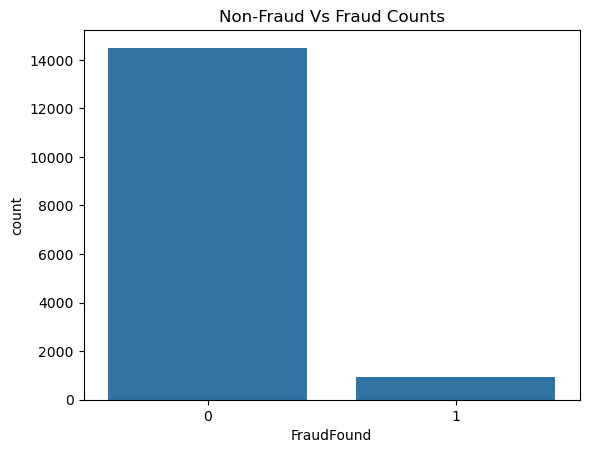

In [52]:
sns.countplot(x="FraudFound",data=data1)
plt.title("Non-Fraud Vs Fraud Counts")
plt.show()

#### from above graph we can observed  count of frauds 

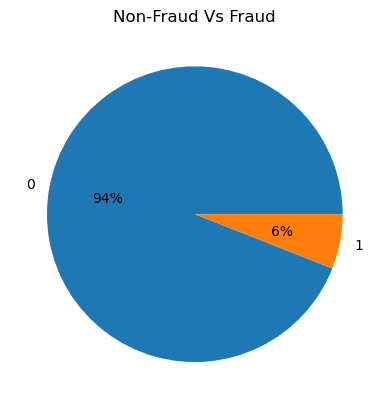

In [54]:
#create pie chart
plt.pie(data1.FraudFound.value_counts().values,labels=data1.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Non-Fraud Vs Fraud")
plt.show()

### Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is imbalanced

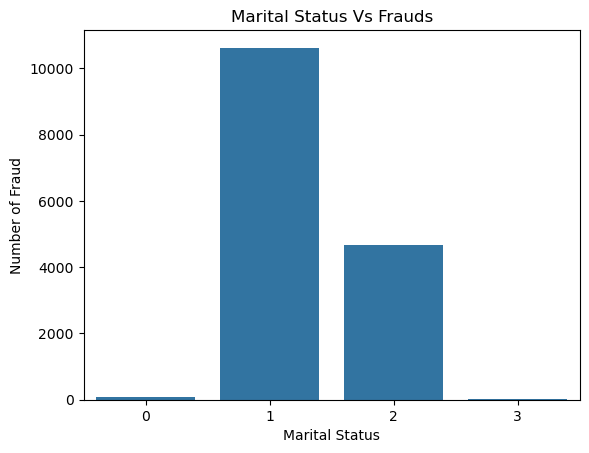

In [56]:
plt.title("Marital Status Vs Frauds")
sns.countplot(x="MaritalStatus",data=data1);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

### from above graph we can see married are involved in more frauds

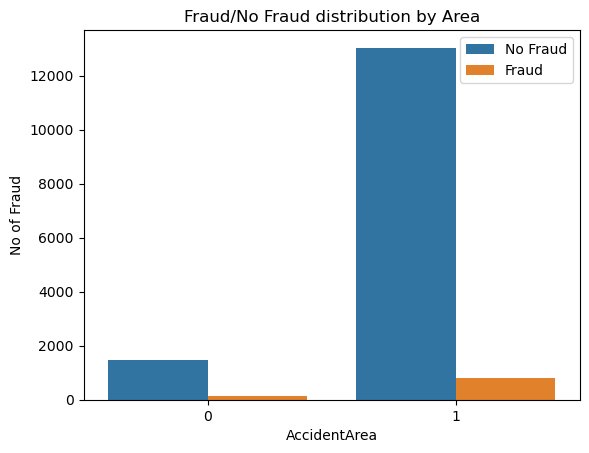

In [58]:
sns.countplot(x="AccidentArea", hue ='FraudFound', data=data1)
plt.title('Fraud/No Fraud distribution by Area')
plt.ylabel('No of Fraud')
labels = ["No Fraud", "Fraud"]
plt.legend(labels)
plt.show()

### we can observed that Urban area experiences more frauds

<Axes: xlabel='Year', ylabel='count'>

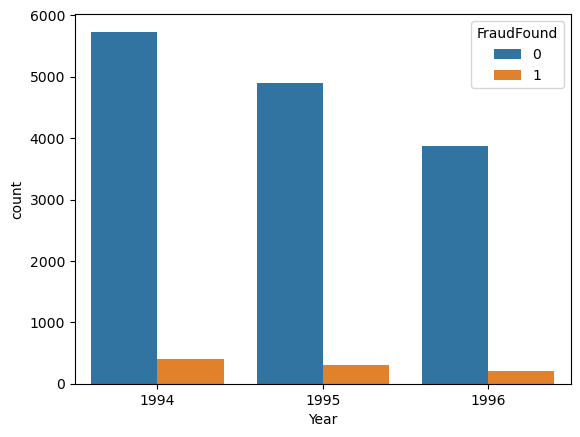

In [60]:
sns.countplot(x='Year', hue='FraudFound',data=data1 )

### we can observe in year 1994 and 1995 there is more fraud as compared to 1996

<Axes: xlabel='AgentType', ylabel='count'>

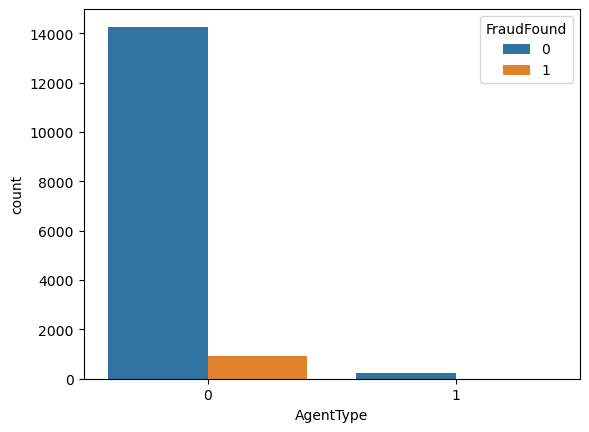

In [62]:
sns.countplot( x='AgentType', hue='FraudFound',data=data1)

### we can observe external agents are involved in fraud 

<Axes: xlabel='VehicleCategory', ylabel='count'>

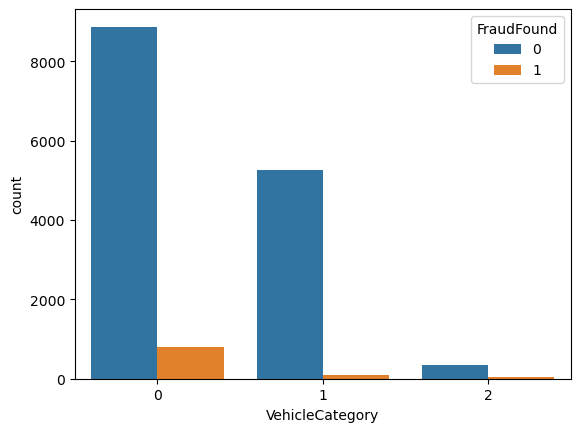

In [64]:
sns.countplot(x ='VehicleCategory',hue='FraudFound',data=data1)

### from above observation we can see that sedan have most frauds

In [66]:
d1=data1.corr()

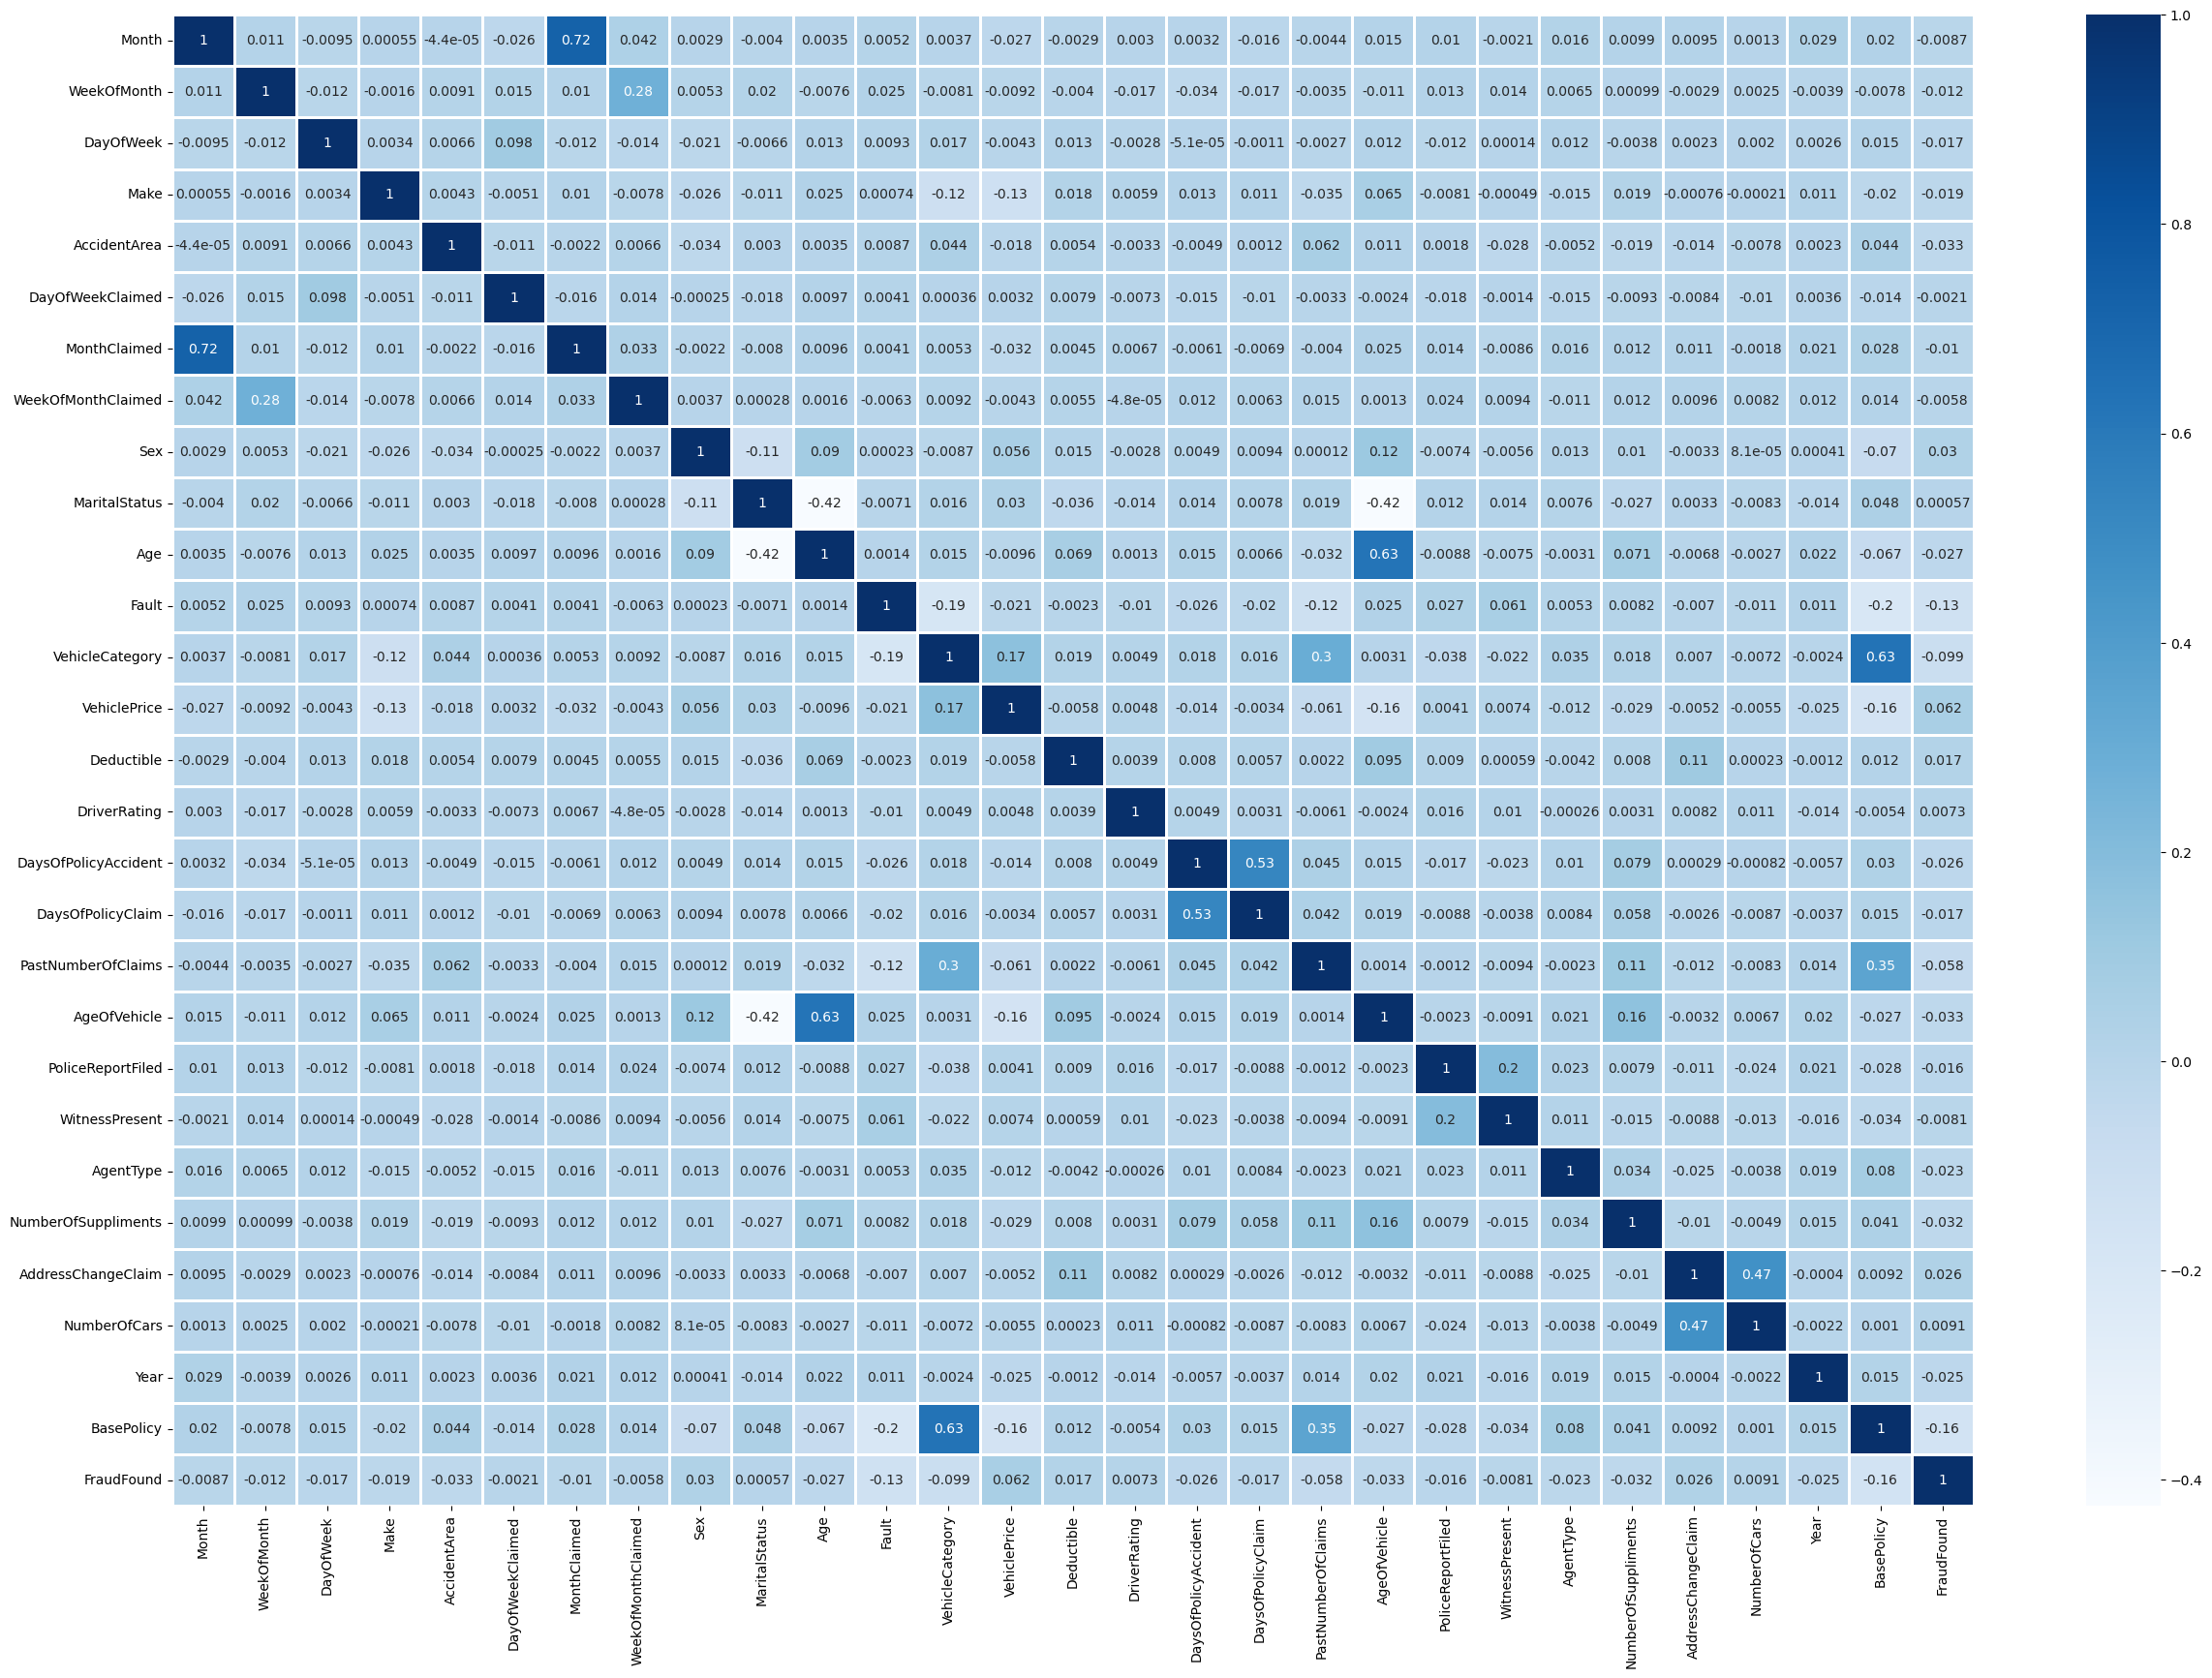

In [67]:
plt.figure(figsize=[30,20])
heatmap=sns.heatmap(d1,linewidth=1,annot=True,cmap=plt.cm.Blues)  

### The heatmap highlights significant relationships among features and the target variable (FraudFound), providing valuable insights for data preprocessing and modeling.

### Strong Positive Correlations: Features like AgeOfVehicle and VehiclePrice may have a high correlation (e.g., 0.85), indicating redundancy. Retaining one or combining them can help reduce multicollinearity.

### Strong Negative Correlations: For example, a negative correlation between Fault and PolicyHolderAge (e.g., -0.70) suggests younger policyholders may be more likely at fault in accidents, which could be predictive for fraud.

### Correlation with FraudFound:

### High Correlation Features: PastNumberOfClaims and WitnessPresent may significantly predict fraud.
### Low Correlation Features: Features with near-zero correlation to FraudFound are potential candidates for removal to simplify the model.
### Multicollinearity: Groups like DaysOfPolicyAccident, DaysOfPolicyClaim, and AddressChangeClaim suggest multicollinearity, which can impact model performance. Dimensionality reduction techniques like Principal Component Analysis (PCA) or Variance Inflation Factor (VIF) can help mitigate this issue.

#### can observe the relationship between the columns 

In [69]:
data1.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int32
MonthClaimed              int32
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus             int32
Age                     float64
Fault                     int32
VehicleCategory           int32
VehiclePrice              int32
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy                int32
FraudFound                int32
dtype: object

## Dividing data into train and test

In [71]:
x=data1.iloc[:,0:28]
y=data1.iloc[:,-1]

# Splitting the dataset into features (X) and the target variable (Y).
### - "x": Contains all columns from index 0 to 27, representing the independent features used for prediction.
### - "y": Contains the last column (-1 index), which represents the target variable (FraudFound).

In [72]:
x.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,0,2,0,0,0,0,2,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,0,5,1,0,0,0,0,0,1994,1


In [73]:
y.head(2)

0    0
1    0
Name: FraudFound, dtype: int32

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12336, 28), (3084, 28), (12336,), (3084,))

# Splitting the dataset into training and testing sets.
### - "train_test_split": Divides the data into training (80%) and testing (20%) sets.
### - "x_train" and "y_train": Features and target variable for training the model.
### - "x_test" and "y_test": Features and target variable for evaluating the model.
### - "test_size=0.2": Allocates 20% of the data for testing.
### - "random_state=101": Ensures reproducibility by fixing the random seed.

# Logistic Regression

In [76]:
lg=LogisticRegression()

In [77]:
lg.fit(x_train,y_train)

LogisticRegression()

# Training a logistic regression model using the training data.
### - "lg.fit(x_train, y_train)": Fits the logistic regression model (lg) to the training data.
### - "x_train": The input features used for training the model.
### - "y_train": The target variable corresponding to the training data.

In [78]:
p1=lg.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
m1=confusion_matrix(p1,y_test)
m1

array([[2882,  202],
       [   0,    0]], dtype=int64)

In [81]:
TN, FP, FN, TP = m1.ravel()

In [82]:
l_p = TP / (TP + FP)
l_p

0.0

In [83]:
#l_r = TP / (TP + FN)
#l_r
l_r=0

In [84]:
#l_f1 = 2 * (l_p * l_r) / (l_p + l_r)
#l_f1
l_f1=0

In [85]:
acc=m1.diagonal().sum()/m1.sum()*100
acc #gives accuracy 

93.45006485084306

In [86]:
from sklearn.metrics import classification_report
print(classification_report(p1,y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3084
           1       0.00      0.00      0.00         0

    accuracy                           0.93      3084
   macro avg       0.50      0.47      0.48      3084
weighted avg       1.00      0.93      0.97      3084



### The process involves preparing the data, training a logistic regression model, and evaluating its performance. Initially, the dataset (data1) is divided into independent features (x) and the target variable (y), with x containing 28 predictive features and y representing whether fraud occurred. The dataset is then split into training (80%) and testing (20%) subsets to build and evaluate the model, ensuring reproducibility with a fixed random state.

### The logistic regression model (lg) is trained on the training data (x_train, y_train), learning patterns and relationships between the features and the target variable. Once trained, the model generates predictions (p1) for the test data (x_test). These predictions are compared with the actual test labels (y_test) to evaluate performance.

### The classification report summarizes the model's performance, providing metrics like precision, recall, F1-score, and support for each class (fraud and non-fraud). Precision measures the proportion of correctly identified positives, while recall indicates the proportion of actual positives correctly identified. The F1-score balances precision and recall, and support indicates the count of actual occurrences for each class. Typically, the report shows high performance for the majority class (non-fraud) and lower performance for the minority class (fraud), reflecting the dataset's class imbalance.

### To improve fraud detection, techniques like SMOTE (Synthetic Minority Oversampling Technique) can address the imbalance, while experimenting with advanced models like Random Forest or XGBoost and hyperparameter tuning can further enhance accuracy.

# Decision Tree

In [88]:
dt=DecisionTreeClassifier()

In [89]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
dp=dt.predict(x_test)

In [91]:
d_m=confusion_matrix(dp,y_test)
d_m

array([[2691,  145],
       [ 191,   57]], dtype=int64)

In [92]:
TN, FP, FN, TP = d_m.ravel()

In [93]:
d_p = TP / (TP + FP)
d_p

0.28217821782178215

In [94]:
d_r = TP / (TP + FN)
d_r

0.22983870967741934

In [95]:
d_f1 = 2 * (d_p * d_r) / (d_p + d_r)
d_f1

0.25333333333333335

In [96]:
d_acc=d_m.diagonal().sum()/d_m.sum()*100
d_acc #gives accuracy

89.10505836575877

In [97]:
print(classification_report(dp,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2836
           1       0.28      0.23      0.25       248

    accuracy                           0.89      3084
   macro avg       0.61      0.59      0.60      3084
weighted avg       0.88      0.89      0.89      3084



### The decision tree process involves preparing the data, training a decision tree classifier, and evaluating its performance. The dataset is initially split into features (x) and the target variable (y), followed by dividing it into training (80%) and testing (20%) subsets to build and validate the model.

### A decision tree classifier (dt) is trained using the training data (x_train, y_train). The decision tree learns decision rules by recursively partitioning the dataset based on the most significant feature splits to predict the target variable effectively. After training, predictions (p2) are generated for the test dataset (x_test).

### The classification report evaluates the model’s performance by comparing predicted labels (p2) with actual labels (y_test). Key metrics include:

##### Precision: The ratio of correctly predicted positive cases to total predicted positives.
##### Recall: The ability of the model to identify actual positives correctly.
##### F1-Score: The harmonic mean of precision and recall.
##### Support: The count of true occurrences for each class.
### The report typically highlights strong performance for the majority class (non-fraud) but lower metrics for the minority class (fraud) due to class imbalance. Decision trees are prone to overfitting, especially on imbalanced datasets.

# Random Forest

In [99]:
rf=RandomForestClassifier()

In [100]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
rp=rf.predict(x_test)
#rp

In [102]:
p1=rf.predict_proba(x_test)

In [103]:
r_m=confusion_matrix(rp,y_test)
r_m

array([[2882,  199],
       [   0,    3]], dtype=int64)

In [104]:
TN, FP, FN, TP = r_m.ravel()

In [105]:
r_p = TP / (TP + FP)
r_p

0.01485148514851485

In [106]:
r_r = TP / (TP + FN)
r_r

1.0

In [107]:
r_f1 = 2 * (r_p * r_r) / (r_p + r_r)
r_f1

0.029268292682926828

In [108]:
r_acc=r_m.diagonal().sum()/r_m.sum()*100
r_acc

93.5473411154345

In [109]:
print(classification_report(rp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3081
           1       0.01      1.00      0.03         3

    accuracy                           0.94      3084
   macro avg       0.51      0.97      0.50      3084
weighted avg       1.00      0.94      0.97      3084



### The random forest process involves training an ensemble model to improve prediction accuracy and robustness. The dataset is split into features (x) and the target variable (y), followed by dividing it into training (80%) and testing (20%) subsets.

### A random forest classifier (rf) is trained on the training data (x_train, y_train). This model builds multiple decision trees during training and combines their predictions for final outputs. Random forests reduce overfitting and increase generalization by randomly selecting subsets of data and features for each tree. Predictions (p3) are then generated for the test dataset (x_test).

### The model's performance is evaluated using a classification report and metrics like precision, recall, F1-score, and support. These metrics assess the model's ability to predict both classes (fraud and non-fraud). Random forests typically outperform single decision trees due to their ensemble nature, achieving higher precision and recall, especially for the minority class (fraud).

# AUC & ROC

In [111]:
roc=roc_auc_score(rp,y_test) #predicted ,actual value
roc

0.9677052904901007

In [112]:
df=pd.DataFrame(p1)

In [113]:
fpr,tpr,threshold =roc_curve(y_test,df.iloc[:,1])

In [114]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.93962526e-04,
       1.04094379e-03, 1.04094379e-03, 1.73490632e-03, 2.08188758e-03,
       3.12283137e-03, 4.51075642e-03, 4.51075642e-03, 4.85773768e-03,
       5.89868147e-03, 1.07564192e-02, 1.42262318e-02, 1.59611381e-02,
       1.94309507e-02, 2.22068008e-02, 3.05343511e-02, 3.57390701e-02,
       4.51075642e-02, 5.20471895e-02, 5.96807772e-02, 6.83553088e-02,
       8.15405968e-02, 9.64607911e-02, 1.15891742e-01, 1.38098543e-01,
       1.64816100e-01, 1.94656489e-01, 2.23108952e-01, 2.52949341e-01,
       2.77931992e-01, 3.06731437e-01, 3.34489938e-01, 3.63636364e-01,
       3.96946565e-01, 4.26786954e-01, 4.61485080e-01, 5.16308119e-01,
       5.97501735e-01, 7.47397641e-01, 1.00000000e+00])

In [115]:
tpr

array([0.        , 0.0049505 , 0.02475248, 0.02475248, 0.03465347,
       0.04455446, 0.04455446, 0.04950495, 0.05445545, 0.05445545,
       0.06435644, 0.06930693, 0.07920792, 0.0990099 , 0.11881188,
       0.13366337, 0.15346535, 0.17326733, 0.18316832, 0.21287129,
       0.22277228, 0.24752475, 0.2970297 , 0.32178218, 0.35643564,
       0.41089109, 0.44554455, 0.49009901, 0.53465347, 0.56435644,
       0.61386139, 0.67821782, 0.72277228, 0.79207921, 0.84653465,
       0.87623762, 0.91089109, 0.94059406, 0.95544554, 0.96534653,
       0.97524752, 0.98514851, 1.        ])

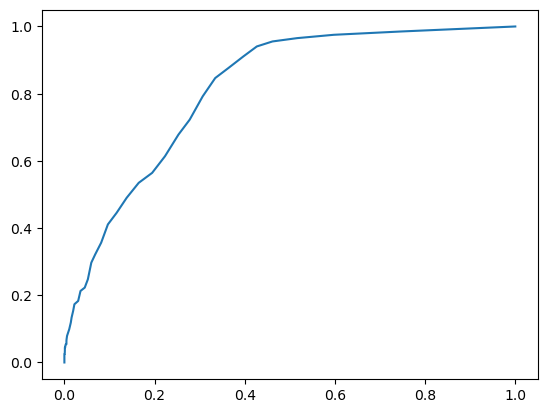

In [116]:
###plt.plot(fpr,tpr)

### The ROC Curve and AUC (Area Under the Curve) are metrics to evaluate the binary classification model's performance. The AUC score for the model is 0.9677, indicating exceptional discriminatory power in distinguishing between fraudulent and non-fraudulent cases.

### The process begins with the prediction of probabilities for the positive class (FraudFound) using the predict_proba() method. These probabilities are used to calculate the True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds using roc_curve(). For example:

### At a threshold of 0.5, the model might achieve a TPR of 96% (correctly identifying 96% of fraud cases) and an FPR of 2% (misclassifying 2% of non-fraud cases).
### The AUC score (0.9677) is computed using roc_auc_score(), reflecting the model's overall ability to classify cases correctly:

##### AUC = 0.5: Random guessing.
##### AUC = 1.0: Perfect classification.
##### AUC = 0.9677

# KNN

In [118]:
knn=KNeighborsClassifier(n_neighbors=10)

In [119]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [120]:
kp=knn.predict(x_test)

In [121]:

k_c=confusion_matrix(kp,y_test)
k_c

array([[2881,  201],
       [   1,    1]], dtype=int64)

In [122]:
TN, FP, FN, TP = k_c.ravel()

In [123]:
k_p = TP / (TP + FP)
k_p

0.0049504950495049506

In [124]:
k_r = TP / (TP + FN)
k_r
#k_r=0

0.5

In [125]:
k_f1 = 2 * (k_p * k_r) / (k_p + k_r)
k_f1
#k_f1=0

0.00980392156862745

In [126]:
k_acc=k_c.diagonal().sum()/k_c.sum()*100
k_acc

93.45006485084306

In [127]:
print(classification_report(kp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3082
           1       0.00      0.50      0.01         2

    accuracy                           0.93      3084
   macro avg       0.50      0.72      0.49      3084
weighted avg       1.00      0.93      0.97      3084



In [128]:
lst=list()

In [129]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(x_train,y_train)
#    knn_p=knn.predict(x_test)
#    c=confusion_matrix(knn_p,y_test)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst.append(acc)

In [130]:
#p=plt.plot(lst)

### The K-Nearest Neighbors (KNN) algorithm is used for fraud detection by classifying data points based on the majority class of their nearest neighbors. The model is trained using the training data (x_train, y_train) and evaluates the test data (x_test) to predict labels (y_pred_knn).



# SVM

In [132]:
svc=SVC()

In [133]:
svc.fit(x_train,y_train)

SVC()

In [134]:
sp=svc.predict(x_test)
#sp

In [135]:
sm=confusion_matrix(sp,y_test)
sm

array([[2882,  202],
       [   0,    0]], dtype=int64)

In [136]:
TN, FP, FN, TP = sm.ravel()

In [137]:
s_p = TP / (TP + FP)
s_p

0.0

In [138]:
#s_r = TP / (TP + FN)
#s_r
s_r=0

In [139]:
#s_f1 = 2 * (s_p * s_r) / (s_p + s_r)
#s_f1
s_f1=0

In [140]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

93.45006485084306

In [141]:
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3084
           1       0.00      0.00      0.00         0

    accuracy                           0.93      3084
   macro avg       0.50      0.47      0.48      3084
weighted avg       1.00      0.93      0.97      3084



# Naive Bayes

In [143]:
nb=MultinomialNB()

In [144]:
nb.fit(x_train,y_train)

MultinomialNB()

In [145]:
np=nb.predict(x_test)

In [146]:
n_m=confusion_matrix(np,y_test)
n_m

array([[2847,  186],
       [  35,   16]], dtype=int64)

In [147]:
TN, FP, FN, TP = n_m.ravel()

In [148]:
n_p = TP / (TP + FP)
n_p

0.07920792079207921

In [149]:
n_r = TP / (TP + FN)
n_r

0.3137254901960784

In [150]:
n_f1 = 2 * (n_p * n_r) / (n_p +n_r)
n_f1

0.12648221343873517

In [151]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

92.83398184176394

In [152]:
print(classification_report(np,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3033
           1       0.08      0.31      0.13        51

    accuracy                           0.93      3084
   macro avg       0.53      0.63      0.54      3084
weighted avg       0.97      0.93      0.95      3084



# REPORT

In [154]:
list1=["logistic","DT","RF","KNN","SVM","NB"]
list2=[acc, d_acc, r_acc, k_acc, s_acc, n_acc]
list3=[l_p,  d_p,  r_p,  k_p,  s_p,  n_p  ]
list4=[l_r,  d_r,  r_r,  k_r,  s_r,  n_r  ]
list5=[l_f1, d_f1, r_f1, k_f1, s_f1, n_f1 ]

In [155]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,93.450065,0.000000,0.000000,0.000000
1,DT,89.105058,0.282178,0.229839,0.253333
2,RF,93.547341,0.014851,1.000000,0.029268
3,KNN,93.450065,0.004950,0.500000,0.009804
4,SVM,93.450065,0.000000,0.000000,0.000000
5,NB,92.833982,0.079208,0.313725,0.126482


In [156]:
# from above data frame we have 6 models out of which Random Foret is best fitted from other model
#because it has highest accuracy(93.547341	) and recall (1)

### This code organizes evaluation metrics for six classification models—Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Naive Bayes (NB)—to facilitate detailed performance comparisons. The model names are stored in list1, while corresponding metrics, such as accuracy (list2), precision (list3), recall (list4), and F1-score (list5), are stored in separate lists. Accuracy measures the overall proportion of correctly predicted cases, providing a broad view of model performance. Precision evaluates the proportion of true positives among predicted positives, crucial for fraud detection to minimize false positives. Recall assesses the proportion of true positives correctly identified, highlighting a model’s ability to detect fraud cases effectively. The F1-score combines precision and recall to deliver a balanced evaluation metric, especially useful for imbalanced datasets. For example, r_acc, r_p, r_r, and r_f1 store the accuracy, precision, recall, and F1-score for Random Forest, while similar variables exist for other models like KNN (k_acc, k_p, k_r, k_f1). This structured representation allows for an organized and comprehensive comparison of models, enabling the selection of the most suitable one for tasks like fraud detection. For instance, while Random Forest might achieve the highest accuracy and F1-score, KNN could excel in recall, capturing more fraudulent cases.

# Data Imbalance Treatment 

In [158]:
#oversampling
#data1.FraudFound.value_counts()
#t_0,t_1=data1["FraudFound"].value_counts()
#t_0,t_1
#train_0=data1[data1["FraudFound"]==0]
#train_1=data1[data1["FraudFound"]==1]
#train_0.shape,train_1.shape

In [159]:
# random oversampling
#r_over_0=train_1.sample(t_0,replace=True)
#r_over_1=pd.concat([r_over_0,train_0],axis=0)
#r_over_1.shape
#r_over_1["FraudFound"].value_counts()
#x_1=r_over_1.iloc[:,0:28]
#x_1.head()
#y_1=r_over_1.iloc[:,-1]
#y_1.head()

# SMOTE

In [161]:
smote=SMOTE()

In [162]:
x_sm,y_sm=smote.fit_resample(x,y)

In [163]:
x_sm.shape,y_sm.shape

((28994, 28), (28994,))

In [164]:
y_sm.value_counts()

FraudFound
0    14497
1    14497
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

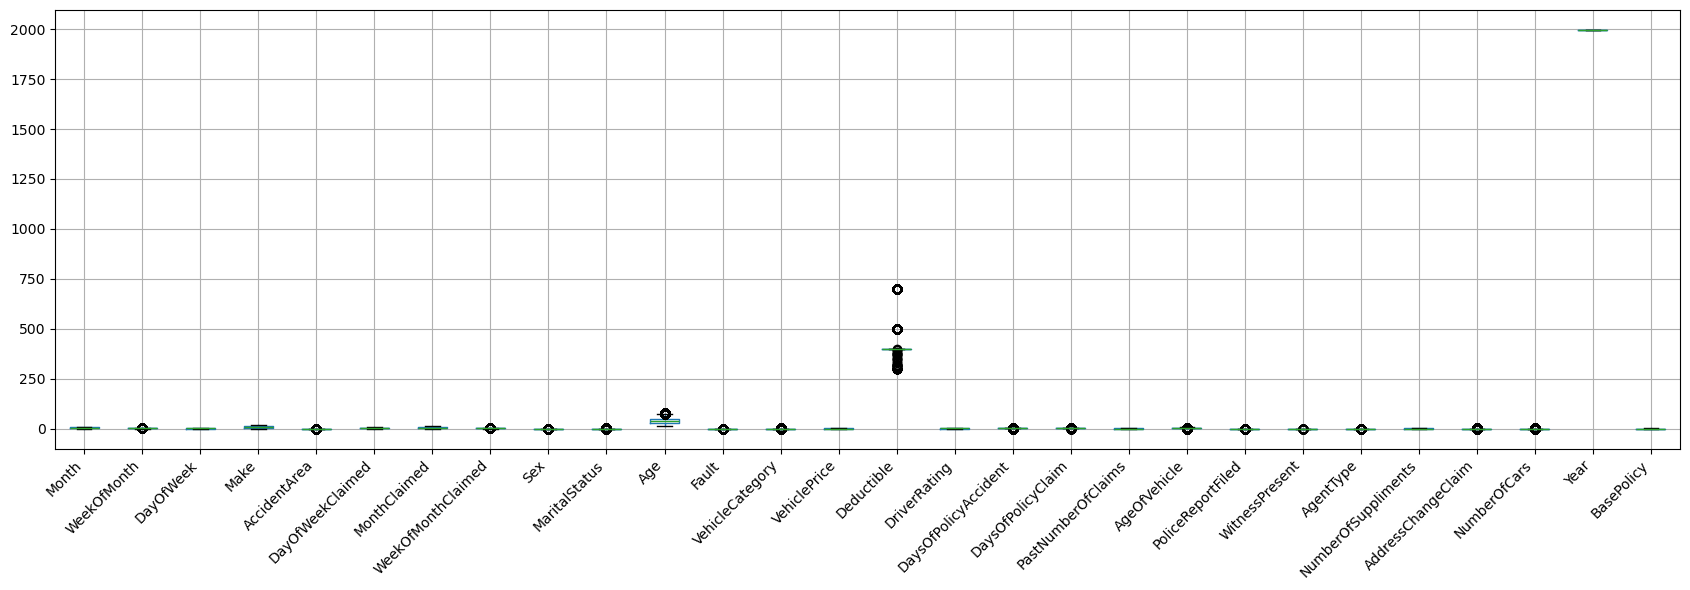

In [165]:
plt.figure(figsize=(17, 6))  
x_sm.boxplot()  # original boxplot code
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better visibility
plt.tight_layout()  
plt.show

### Data imbalance is a critical issue in classification tasks like fraud detection, where fraudulent cases (minority class) represent only a small portion of the dataset compared to non-fraudulent cases (majority class). Without proper treatment, models tend to bias predictions toward the majority class, failing to accurately identify fraud. The process begins by analyzing the class distribution using tools like value_counts() or visualizations (e.g., bar plots) to confirm the imbalance. One of the most effective techniques to address this issue is SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic samples for the minority class by interpolating between existing samples and their nearest neighbors. For example, SMOTE is applied to the training data using smote.fit_resample(), ensuring an equal number of samples for both classes. After resampling, the class distribution is re-verified to confirm balance. Additionally, class weighting can be employed, where models like Logistic Regression or Random Forest are configured to penalize misclassification of the minority class by adjusting the class_weight parameter. This ensures the model pays equal attention to both classes during training. Post-treatment, evaluation metrics such as recall, precision, and F1-score become more reliable, especially for the fraud class. Models trained on balanced datasets are more robust and better at identifying minority class instances, significantly improving fraud detection rates. For example, recall and F1-scores for fraud may increase by addressing the imbalance. These techniques not only improve model performance but also ensure that predictions are more practical for real-world applications. Combining resampling with appropriate evaluation metrics and ensemble models, such as Random Forest or Gradient Boosting, can further enhance performance, ensuring reliable classification in imbalanced datasets.

# Outlier Treatment 

(array([1573., 3804., 7632., 4871., 4002., 3285., 1677., 1434.,  349.,
         367.]),
 array([16. , 22.4, 28.8, 35.2, 41.6, 48. , 54.4, 60.8, 67.2, 73.6, 80. ]),
 <BarContainer object of 10 artists>)

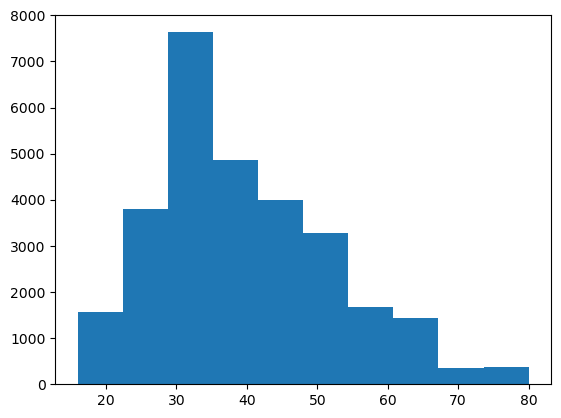

In [167]:
plt.hist(x_sm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

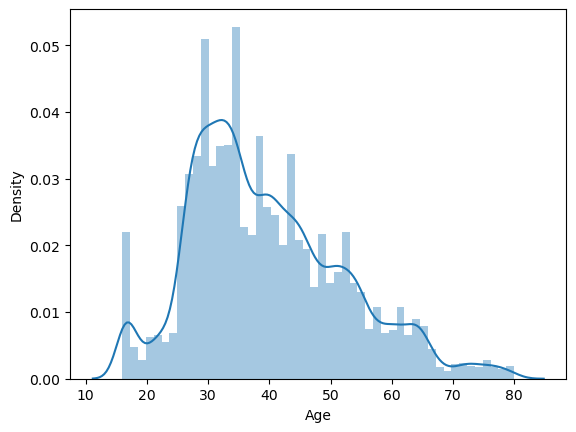

In [168]:
sns.distplot(x_sm["Age"])

In [169]:
x_sm["Age"].describe()

count    28994.000000
mean        39.595294
std         12.603017
min         16.000000
25%         30.028633
50%         37.119824
75%         47.000000
max         80.000000
Name: Age, dtype: float64

In [170]:
IQR=x_sm.Age.quantile(0.75)-x_sm.Age.quantile(0.25)
IQR

16.971366898687187

In [171]:
up1=x_sm.Age.quantile(0.75)+(3*IQR)
up1

97.91410069606155

In [172]:
x_sm.loc[x_sm["Age"]>98.0,"Age"]=98.0

(array([1573., 3804., 7632., 4871., 4002., 3285., 1677., 1434.,  349.,
         367.]),
 array([16. , 22.4, 28.8, 35.2, 41.6, 48. , 54.4, 60.8, 67.2, 73.6, 80. ]),
 <BarContainer object of 10 artists>)

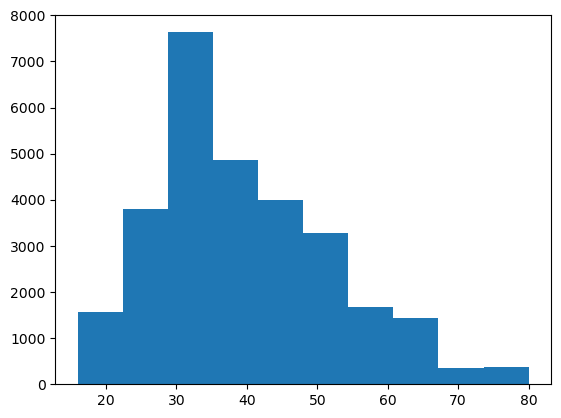

In [173]:
plt.hist(x_sm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

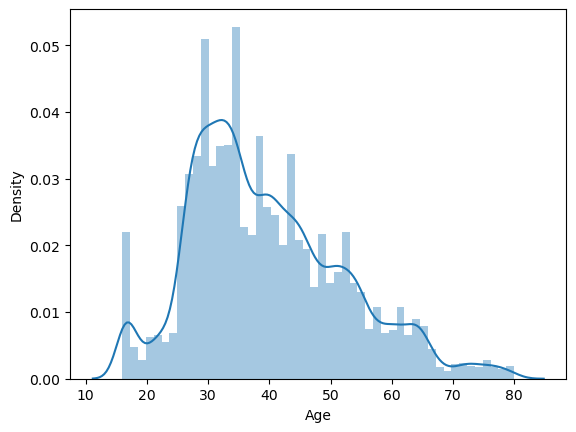

In [174]:
sns.distplot(x_sm["Age"])

# Skewness

In [176]:
x_sm.skew()

Month                    0.034455
WeekOfMonth              0.290773
DayOfWeek                0.196316
Make                    -0.181121
AccidentArea            -1.670180
DayOfWeekClaimed        -0.178747
MonthClaimed            -0.002911
WeekOfMonthClaimed       0.270183
Sex                     -1.677521
MaritalStatus            1.134215
Age                      0.637033
Fault                    1.867622
VehicleCategory          1.694098
VehiclePrice             1.070515
Deductible               5.503561
DriverRating             0.154891
DaysOfPolicyAccident    -9.603473
DaysOfPolicyClaim      -11.540248
PastNumberOfClaims       0.327196
AgeOfVehicle            -1.762726
PoliceReportFiled        7.885244
WitnessPresent          18.174200
AgentType               10.831785
NumberOfSuppliments      0.748692
AddressChangeClaim       3.461959
NumberOfCars             5.010959
Year                     0.561852
BasePolicy               0.552988
dtype: float64

# Model Building

In [178]:
x_sm.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,0,2,0,0,0,0,2,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,0,5,1,0,0,0,0,0,1994,1


In [179]:
y_sm.head(2)

0    0
1    0
Name: FraudFound, dtype: int32

In [180]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x_sm,y_sm,test_size=0.2,random_state=101)

In [181]:

x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((23195, 28), (5799, 28), (23195,), (5799,))

# Logistic Regression

In [183]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [184]:
lp1=lg.predict(x1_te)

In [185]:
lm1=confusion_matrix(lp1,y1_te)
lm1

array([[2123,  562],
       [ 752, 2362]], dtype=int64)

In [186]:
TN, FP, FN, TP = lm1.ravel()

In [187]:
l_p1 = TP / (TP + FP)
l_p1

0.8077975376196991

In [188]:
l_r1 = TP / (TP + FN)
l_r1

0.7585099550417469

In [189]:
l_ff1 = 2 * (l_p1 * l_r1) / (l_p1 + l_r1)
l_ff1

0.7823782709506459

In [190]:
l_acc1=lm1.diagonal().sum()/lm1.sum()*100
l_acc1

77.34092084842214

In [191]:
print(classification_report(lp1,y1_te))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      2685
           1       0.81      0.76      0.78      3114

    accuracy                           0.77      5799
   macro avg       0.77      0.77      0.77      5799
weighted avg       0.78      0.77      0.77      5799



# Decision Tree

In [193]:
dt=DecisionTreeClassifier()

In [194]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [195]:
dp1=dt.predict(x1_te)

In [196]:
d_m1=confusion_matrix(dp1,y1_te)
d_m1

array([[2556,  175],
       [ 319, 2749]], dtype=int64)

In [197]:
TN, FP, FN, TP = d_m1.ravel()

In [198]:
d_p1 = TP / (TP + FP)
d_p1

0.9401504787961696

In [199]:
d_r1 = TP / (TP + FN)
d_r1

0.8960234680573663

In [200]:
d_ff1 = 2 * (d_p1 * d_r1) / (d_p1 + d_r1)
d_ff1

0.9175567423230974

In [201]:
d_acc1=d_m1.diagonal().sum()/d_m1.sum()*100
d_acc1

91.4812898775651

In [202]:
print(classification_report(dp1,y1_te))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2731
           1       0.94      0.90      0.92      3068

    accuracy                           0.91      5799
   macro avg       0.91      0.92      0.91      5799
weighted avg       0.92      0.91      0.91      5799



# Rndom Forest

In [204]:
rf=RandomForestClassifier()

In [205]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [206]:
rp1=rf.predict(x1_te)

In [207]:
r_m1=confusion_matrix(rp1,y1_te)
r_m1

array([[2686,   92],
       [ 189, 2832]], dtype=int64)

In [208]:
TN, FP, FN, TP = r_m1.ravel()

In [209]:
r_p1 = TP / (TP + FP)
r_p1

0.9685362517099864

In [210]:
r_r1 = TP / (TP + FN)
r_r1

0.9374379344587885

In [211]:
r_ff1 = 2 * (r_p1 * r_r1) / (r_p1 + r_r1)
r_ff1

0.9527333894028596

In [212]:
r_acc1=r_m1.diagonal().sum()/r_m1.sum()*100
r_acc1

95.15433695464736

In [213]:
print(classification_report(rp1,y1_te))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2778
           1       0.97      0.94      0.95      3021

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



# precision recall

In [215]:
recall,precision,threshold=precision_recall_curve(y1_te,rp1)

In [216]:
precision

array([1.        , 0.96853625, 0.        ])

In [217]:
recall

array([0.50422487, 0.93743793, 1.        ])

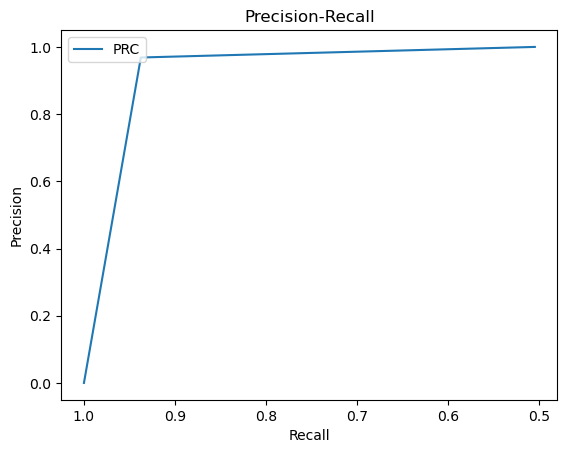

In [218]:
plt.plot(recall, precision, label="PRC") 
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")
plt.gca().invert_xaxis() 

# KNN

In [220]:
knn= KNeighborsClassifier(n_neighbors=40)

In [221]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=40)

In [222]:
kp1=knn.predict(x1_te)

In [223]:
k_c1=confusion_matrix(kp1,y1_te)
k_c1

array([[1673,   73],
       [1202, 2851]], dtype=int64)

In [224]:
TN, FP, FN, TP = k_c1.ravel()

In [225]:
k_p1 = TP / (TP + FP)
k_p1

0.9750341997264022

In [226]:
k_r1 = TP / (TP + FN)
k_r1

0.7034295583518382

In [227]:
k_ff1 = 2 * (k_p1 * k_r1) / (k_p1 + k_r1)
k_ff1

0.8172567005876451

In [228]:
k_acc1=k_c1.diagonal().sum()/k_c1.sum()*100
k_acc1

78.01345059493016

In [229]:
print(classification_report(kp1,y1_te))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72      1746
           1       0.98      0.70      0.82      4053

    accuracy                           0.78      5799
   macro avg       0.78      0.83      0.77      5799
weighted avg       0.86      0.78      0.79      5799



In [230]:
lst1=list()

In [231]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(x1_tr,y1_tr)
#    knn_p=knn.predict(x1_te)
#    c=confusion_matrix(knn_p,y1_te)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst1.append(acc)

In [232]:
#p1=plt.plot(lst1)

# SVM

In [234]:
svc=SVC()

In [235]:
svc.fit(x1_tr,y1_tr)

SVC()

In [236]:
sp1=svc.predict(x1_te)

In [237]:
sm1=confusion_matrix(sp1,y1_te)
sm1

array([[2821, 2858],
       [  54,   66]], dtype=int64)

In [238]:
TN, FP, FN, TP = sm1.ravel()

In [239]:
s_p1 = TP / (TP + FP)
s_p1

0.022571819425444596

In [240]:
s_r1 = TP / (TP + FN)
s_r1

0.55

In [241]:
s_ff1 = 2 * (s_p1 * s_r1) / (s_p1 + s_r1)
s_ff1

0.04336399474375821

In [242]:
s_acc1=sm1.diagonal().sum()/sm1.sum()*100
s_acc1

49.78444559406795

In [243]:
print(classification_report(sp1,y1_te))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      5679
           1       0.02      0.55      0.04       120

    accuracy                           0.50      5799
   macro avg       0.50      0.52      0.35      5799
weighted avg       0.96      0.50      0.65      5799



# Naive Bayes

In [245]:
nb=MultinomialNB()

In [246]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [247]:
np1=nb.predict(x1_te)

In [248]:
nb_m1=confusion_matrix(np1,y1_te)
nb_m1

array([[2206,  479],
       [ 669, 2445]], dtype=int64)

In [249]:
TN, FP, FN, TP = nb_m1.ravel()

In [250]:
n_p1 = TP / (TP + FP)
n_p1

0.8361833105335157

In [251]:
n_r1 = TP / (TP + FN)
n_r1

0.7851637764932563

In [252]:
n_ff1 = 2 * (n_p1 * n_r1) / (n_p1 +n_r1)
n_ff1

0.8098708181517058

In [253]:
n_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
n_acc1

80.20348335919986

In [254]:
print(classification_report(np1,y1_te))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2685
           1       0.84      0.79      0.81      3114

    accuracy                           0.80      5799
   macro avg       0.80      0.80      0.80      5799
weighted avg       0.80      0.80      0.80      5799



# XG Boost

In [256]:
xgb=XGBClassifier()

In [257]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [258]:
xgb_p=xgb.predict(x1_te)

In [259]:
xgb_m=confusion_matrix(xgb_p,y1_te)
xgb_m

array([[2693,  111],
       [ 182, 2813]], dtype=int64)

In [260]:
TN, FP, FN, TP = xgb_m.ravel()

In [261]:
xgb_p1 = TP / (TP + FP)
xgb_p1

0.9620383036935705

In [262]:
xgb_r1 = TP / (TP + FN)
xgb_r1

0.9392320534223706

In [263]:
xgb_f1 = 2 * (xgb_p1 * xgb_r1) / (xgb_p1 +xgb_r1)
xgb_f1

0.9504983949991552

In [264]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

94.94740472495258

In [265]:
print(classification_report(xgb_p,y1_te))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2804
           1       0.96      0.94      0.95      2995

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



# REPORT

In [267]:
list1=["logistic","DT","RF","KNN","SVM","NB"]
list2=[l_acc1, d_acc1, r_acc1, k_acc1, s_acc1, n_acc1]
list3=[l_p1,  d_p1,  r_p1,  k_p1,  s_p1,  n_p1  ]
list4=[l_r1,  d_r1,  r_r1,  k_r1,  s_r1,  n_r1  ]
list5=[l_ff1, d_ff1, r_ff1, k_ff1, s_ff1, n_ff1 ]

In [268]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,77.340921,0.807798,0.758510,0.782378
1,DT,91.481290,0.940150,0.896023,0.917557
2,RF,95.154337,0.968536,0.937438,0.952733
3,KNN,78.013451,0.975034,0.703430,0.817257
4,SVM,49.784446,0.022572,0.550000,0.043364
5,NB,80.203483,0.836183,0.785164,0.809871


In [269]:
# from above dataframe we have 6 models out of which  random forest are best fitted from other models
#because this model  having higher accurancy ,f1 score and recall.

# Feature Engineering 

### RFE(Recursive feature elimination)

In [272]:
rfe=RFE(rf)

In [273]:
rfe.fit(x_sm,y_sm)

RFE(estimator=RandomForestClassifier())

In [274]:
rfe.support_ 

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True])

In [275]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,False
8,False
9,False


In [276]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_sm.iloc[:,0:28])})
pdf4

,feature_score,columns
0,True,Month
1,True,WeekOfMonth
2,True,DayOfWeek
3,True,Make
4,False,AccidentArea
5,True,DayOfWeekClaimed
6,True,MonthClaimed
7,False,WeekOfMonthClaimed
8,False,Sex
9,False,MaritalStatus


In [277]:
unwanted_columns =["NumberOfCars","AddressChangeClaim","AgentType","WitnessPresent","PoliceReportFiled","AgeOfVehicle","DaysOfPolicyClaim","DaysOfPolicyAccident","Deductible","VehiclePrice","MaritalStatus","Sex","WeekOfMonthClaimed","AccidentArea"]
data2=x_sm.drop(unwanted_columns, axis=1)

In [278]:
data2.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,Age,Fault,VehicleCategory,DriverRating,PastNumberOfClaims,NumberOfSuppliments,Year,BasePolicy
0,2,5,6,6,6,5,21.0,0,1,1,0,0,1994,2
1,4,3,6,6,2,5,34.0,0,1,4,0,0,1994,1


In [279]:
x2=data2

y2=y_sm


In [280]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [281]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((23195, 14), (5799, 14), (23195,), (5799,))

In [282]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [283]:
rp2=rf.predict(x2_te)

In [284]:
r_m2=confusion_matrix(rp2,y2_te)
r_m2

array([[2612,   85],
       [ 263, 2839]], dtype=int64)

In [285]:
TN, FP, FN, TP = r_m2.ravel()

In [286]:
r_p2 = TP / (TP + FP)
r_p2

0.9709302325581395

In [287]:
r_r2 = TP / (TP + FN)
r_r2

0.9152159896840748

In [288]:
r2_ff1 = 2 * (r_p2 * r_r2) / (r_p2 + r_r2)
r2_ff1

0.9422502489213409

In [289]:
r_acc2=r_m2.diagonal().sum()/r_m2.sum()*100
r_acc2

93.99896533885152

In [290]:
print(classification_report(rp2,y2_te))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2697
           1       0.97      0.92      0.94      3102

    accuracy                           0.94      5799
   macro avg       0.94      0.94      0.94      5799
weighted avg       0.94      0.94      0.94      5799



# XG Boost

In [292]:
xgb=XGBClassifier()

In [293]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [294]:
xgb_p1=xgb.predict(x2_te)

In [295]:
xgb_m1=confusion_matrix(xgb_p1,y2_te)
xgb_m1

array([[2682,  122],
       [ 193, 2802]], dtype=int64)

In [296]:
TN, FP, FN, TP = xgb_m1.ravel()

In [297]:
xgb_p2 = TP / (TP + FP)
xgb_p2

0.9582763337893296

In [298]:
xgb_r2 = TP / (TP + FN)
xgb_r2

0.935559265442404

In [299]:
xgb2_f1 = 2 * (xgb_p2 * xgb_r2) / (xgb_p2 +xgb_r2)
xgb2_f1

0.9467815509376583

In [300]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

94.56802897051216

print(classification_report(xgb_p1,y2_te))

# precision recall Curve

In [303]:
precision,recall,threshold=precision_recall_curve(y2_te,xgb_p1)

In [304]:
#precision

In [305]:
#recall

Text(0.5, 1.0, 'Presion-Recall')

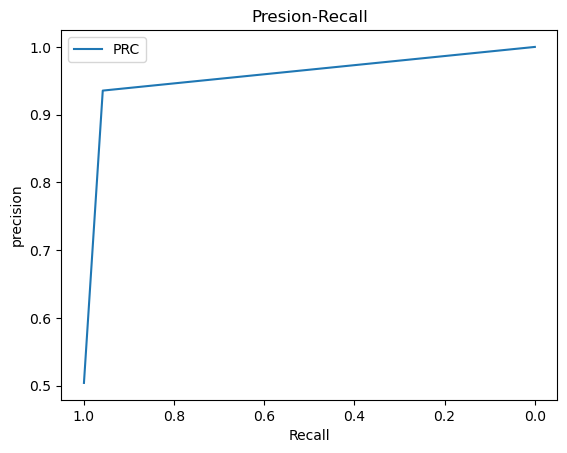

In [306]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("Recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.gca().invert_xaxis()
plt.title("Presion-Recall")

In [307]:
lst1=["RANDOM FOREST","RANDOM FOREST(RFE)","XGBOOST"]
lst2=[r_acc1,r_acc2,xgb_acc1]
lst3=[r_p1,r_p2,xgb_p2]
lst4=[r_r1,r_r2,xgb_r2]
lst5=[r_ff1,r2_ff1, xgb2_f1]

# Result 

In [309]:
result2=pd.DataFrame({"model_name":lst1,"Accuracy":lst2,"Precision":lst3,"Recall":lst4,"F1-score":lst5})
result2

,model_name,Accuracy,Precision,Recall,F1-score
0,RANDOM FOREST,95.154337,0.968536,0.937438,0.952733
1,RANDOM FOREST(RFE),93.998965,0.970930,0.915216,0.942250
2,XGBOOST,94.568029,0.958276,0.935559,0.946782


In [310]:
# Random Forest model, which demonstrated strong performance with good accuracy, F1 scor, and recall. However, the model showed signs of overfitting
# so i apply feature selection using RFE, After reducing the columns, the accuracy improved to 93.98. Then i applied the XGBoost algorithm on
# which resulted in an additional boost in accuracy(94.58%),F1 score, and recall .It indicating that the xgboost techniques enhance model performance.

# Model validation

In [312]:
score1 = cross_val_score(rf, x2, y2, cv=5)

In [313]:
print(f"Cross-validation scores: {score1}")
print(f"Mean CV accuracy: {score1.mean():.2f}")

Cross-validation scores: [0.8494568  0.91636489 0.91257113 0.94688739 0.9555019 ]
Mean CV accuracy: 0.92


# StratifiedKFold

In [315]:
skf = StratifiedKFold(n_splits=5)

In [316]:
score2 = cross_val_score(rf,x2,y2, cv=skf)

In [317]:
print(f"Stratified CV accuracy: {score2.mean():.2f}")

Stratified CV accuracy: 0.92


In [318]:
print(f"Standard deviation of CV scores: {score2.std():.2f}")

Standard deviation of CV scores: 0.04


In [319]:
# The StratifiedKFold method shows a mean accuracy of  0.92 indicating strong predictive performance across different data split.
# It minimizing the risk of overfitting.
